In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from scipy.stats import contingency,ttest_ind,ttest_1samp,f_oneway,chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [4]:
df = pd.read_csv('sampling 1 plays.csv',error_bad_lines=False, low_memory=False)

b'Skipping line 23509: expected 41 fields, saw 43\nSkipping line 36946: expected 41 fields, saw 42\nSkipping line 43788: expected 41 fields, saw 42\nSkipping line 45437: expected 41 fields, saw 49\nSkipping line 52141: expected 41 fields, saw 42\nSkipping line 73470: expected 41 fields, saw 42\nSkipping line 75103: expected 41 fields, saw 42\nSkipping line 87928: expected 41 fields, saw 42\nSkipping line 98453: expected 41 fields, saw 42\nSkipping line 98771: expected 41 fields, saw 42\nSkipping line 101047: expected 41 fields, saw 42\nSkipping line 104676: expected 41 fields, saw 42\n'


### EDA

In [5]:
df.head()

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,app_version,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name
0,0096dafb1049ee942e8e7cbad5abf4a46dc92e3995caac...,0162f124f5bd61592d9bca6aaa3b1b6097a00b62ef33c9...,27dfffe2bb74f8767caeb64ac4c92e9eaf4b11a28ef7e1...,e7c2138fd9d4047356066a01de46fc22ee9955a6fd6679...,NaN,c81bd64a212d3b5cb227499a6b4a3dc607748ae5133e48...,False,embed,web-mobile,2020-02-02T10:21:20.000Z,...,NaN,NaN,0,vod,NaN,Kiprah Eks Pemain Juventus yang Dikaitkan deng...,Sports,NaN,NaN,NaN
1,01ddda2f8667719625bd0afa58537fd95a166c93233b8b...,5f6c722782c919a9cb6254e94086462a6c34794dc741b6...,90b2b454e70a2c13cf9e8ca987d7c4f914c7d819532c5d...,d265ea2b8df584c51de3b2c6aebb6a0415384a18d1a148...,NaN,90a514e451e400c4c32ac42815920a66c500c1c2ea347d...,False,embed,web-mobile,2020-02-02T12:17:33.000Z,...,NaN,NaN,19,vod,NaN,"Pindah ke Inter Milan, Christian Eriksen Jadi ...",Sports,NaN,NaN,NaN
2,01ddda2f8667719625bd0afa58537fd95a166c93233b8b...,66c32aa6aa6a63f7d85d1bd1b8b6b295477c88794888d8...,f79cab25855841a83e6aa01eccbf3d167491a868977b77...,d2585a4b468b7cdbebc053ffc5b49cebd58d6e738bccdd...,NaN,c278001db02102ece22d428b9235332856cba4754b63a0...,False,embed,web-mobile,2020-02-02T01:26:42.000Z,...,NaN,NaN,24,vod,NaN,"Pindah ke Inter Milan, Christian Eriksen Jadi ...",Sports,NaN,NaN,NaN
3,01e34cb2658d0461f220bda493cb38427eef7de1e23e6e...,38976454aec1c7ff4ca0a35df8821db29227443352e705...,f23800acfeede429803cb2a1380ca7652067fb35d079a8...,bba3183af4f6c29d97dce6ee557561e3feef31d19ae9ab...,NaN,ed0731e9861306e6e26cf3cfb5a43da6b0e19af3ff3ff5...,False,embed,web-mobile,2020-02-02T13:45:05.000Z,...,NaN,NaN,0,vod,NaN,5 Kelebihan Mikel Arteta Menurut Pep Guardiola,Sports,NaN,NaN,NaN
4,01e34cb2658d0461f220bda493cb38427eef7de1e23e6e...,4b4ee4aa4c37519250aa6efbd78e789b40d976474a1c37...,b058895b6fce58bcfbd72bfd7a3dfa4ae01d094e21c976...,317ecdb779c3ba5bdc1818405aaafebcef35e9582c42e5...,NaN,3679f65950032d6bff1323df5b29292adad99918d616ae...,False,embed,web-desktop,2020-02-02T13:23:40.000Z,...,NaN,NaN,4,vod,NaN,5 Kelebihan Mikel Arteta Menurut Pep Guardiola,Sports,NaN,NaN,NaN


In [6]:
df.describe()

,average_bitrate,total_bytes,buffer_duration,city,play_duration
count,101865.000000,1.068110e+05,1.068110e+05,0.0,106811.000000
mean,199406.240230,7.765342e+07,2.272422e+05,NaN,425.431847
std,141397.648431,4.683612e+08,7.416347e+07,NaN,1541.638614
min,144.000000,0.000000e+00,0.000000e+00,NaN,0.000000
25%,633.000000,7.500000e+02,0.000000e+00,NaN,4.000000
50%,300000.000000,5.062500e+05,1.000000e+00,NaN,41.000000
75%,300000.000000,1.125000e+07,6.000000e+00,NaN,120.000000
max,300000.000000,3.092062e+10,2.423807e+10,NaN,82455.000000


In [7]:
#help(pd.to_datetime)

In [8]:
df['play_time'] = pd.to_datetime(df['play_time'],yearfirst=True)
df['end_time'] = pd.to_datetime(df['end_time'],yearfirst=True)

# drop end time column, since it is not so useful

In [9]:
df['average_bitrate'] = df['average_bitrate'].astype('int32',errors= 'ignore')

In [10]:
df['bitrate_range'].value_counts()

200-500    67633
0-200      34232
unknown     4946
Name: bitrate_range, dtype: int64

In [11]:
df['total_bytes'].dtype

dtype('int64')

In [12]:
df['buffer_duration'].dtype

dtype('float64')

In [13]:
df['referrer_group'].count()

106811

In [14]:
df['referrer'].count()
# not that useful feature

101050

In [15]:
#df.completed.replace(True,'Completed',inplace=True)

In [16]:
#df.completed.replace(False,'Not Completed',inplace=True)

In [17]:
df['completed'].value_counts()

False    51059
True     16815
Name: completed, dtype: int64

In [18]:
df['utm_source'].value_counts()
# not so useful, consider dropping it

Youtube                66
marketing               9
avod                    8
livestreaming           2
partnership             1
Digital%20Marketing     1
Name: utm_source, dtype: int64

In [19]:
df['utm_source'].value_counts()

Youtube                66
marketing               9
avod                    8
livestreaming           2
partnership             1
Digital%20Marketing     1
Name: utm_source, dtype: int64

In [20]:
df['utm_campaign'].value_counts()

vidio-share        18
vidio-app-share    10
instagram           5
twitter             2
fbig                2
%20kobe_bryant      1
Name: utm_campaign, dtype: int64

In [21]:
df['player_name'].unique()

array(['videojs', 'KmkExoVideoView', nan, 'kmkexoplayer'], dtype=object)

In [22]:
df['player_name'] = df['player_name'].astype('category',errors='ignore')

In [23]:
df['player_name'].value_counts()

videojs            71961
KmkExoVideoView    31582
kmkexoplayer           1
Name: player_name, dtype: int64

In [24]:
df['has_ad']= df['has_ad'].apply(lambda x: 1 if x ==True else 0)
df['has_ad']=df['has_ad'].astype('category',errors='ignore')

In [25]:
df['flash_version'].isnull().sum()
df['flash_version']=df['flash_version'].astype('category',errors='ignore')

In [26]:
df['os_name'].isnull().sum()
df['os_name']=df['os_name'].astype('category',errors='ignore')

In [27]:
df['os_version']=df['os_version'].astype('category',errors='ignore')

In [28]:
df['browser_name']=df['browser_name'].astype('category',errors='ignore')

In [29]:
 df['browser_version']=df['browser_version'].astype('category',errors='ignore')

In [30]:
df['app_name'] = df['app_name'].astype('category',errors='ignore')

In [31]:
#df['autoplay'].replace(True, 1,inplace=True)
#df['autoplay'].replace(False, 0,inplace=True)


In [32]:
df['autoplay'] = df['autoplay'].astype('category',errors='ignore')

In [33]:
df['is_premium']=df['is_premium'].astype('category',errors='ignore')

In [34]:
df['app_version'] = df['app_version'].astype('category',errors='ignore')

In [35]:
df['city'].isnull().sum()
# -_-

106811

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106811 entries, 0 to 106810
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   hash_content_id    106811 non-null  object             
 1   hash_play_id       106811 non-null  object             
 2   hash_visit_id      106811 non-null  object             
 3   hash_watcher_id    106811 non-null  object             
 4   hash_film_id       5818 non-null    object             
 5   hash_event_id      106811 non-null  object             
 6   is_login           106811 non-null  bool               
 7   playback_location  106811 non-null  object             
 8   platform           106811 non-null  object             
 9   play_time          106811 non-null  datetime64[ns, UTC]
 10  end_time           106811 non-null  datetime64[ns, UTC]
 11  referrer           101050 non-null  object             
 12  average_bitrate    101865 non-

In [37]:
df['content_type'] = df['content_type'].astype('category',errors='ignore')

In [38]:
df['stream_type'].value_counts()
df['stream_type'].isnull().sum()
df['stream_type'] = df['stream_type'].astype('category',errors='ignore')

In [39]:
df['title'].nunique()

10162

In [40]:
df['category_name'] = df['category_name'].astype('category',errors='ignore')

In [41]:
df['film_title']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
106806    NaN
106807    NaN
106808    NaN
106809    NaN
106810    NaN
Name: film_title, Length: 106811, dtype: object

# Feature engineering

In [42]:
# inspecting missing value in a percentage 
def missing_percentage(df):
    number_na = df.isnull().sum() * 100 / len(df)
    number_na = number_na[number_na > 0].sort_values()
    return number_na

In [43]:
missing_clm = missing_percentage(df)

In [44]:
# treshold percentage of rows 1%

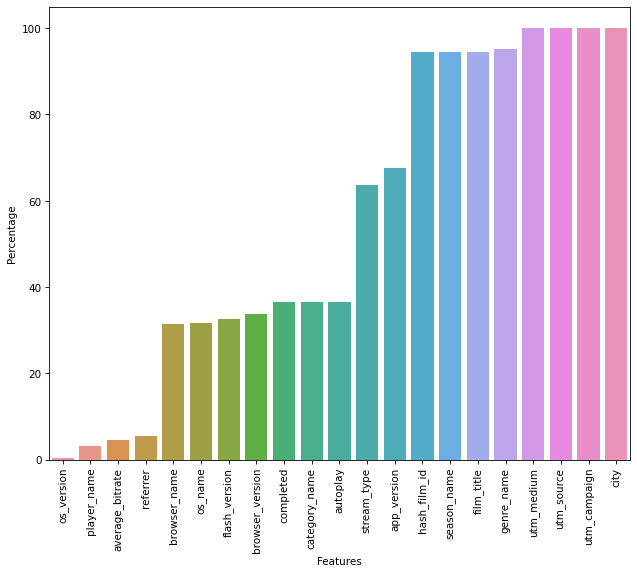

In [45]:
plt.figure(figsize=(10,8),dpi=75)
sns.barplot(x=missing_clm.index,y=missing_clm)
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.xlabel('Features')
plt.show()

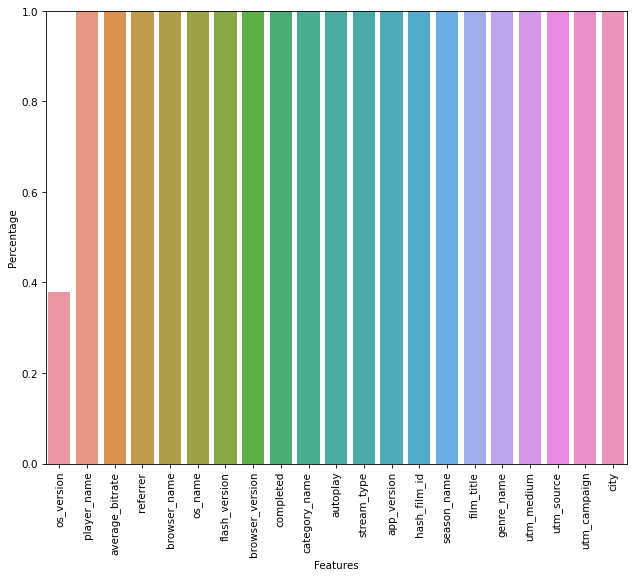

In [46]:
plt.figure(figsize=(10,8),dpi=75)
sns.barplot(x=missing_clm.index,y=missing_clm)
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.xlabel('Features')
plt.ylim([0,1])
plt.show()

In [47]:
df = df.dropna(subset=['os_version'])

In [48]:
missing_clm = missing_percentage(df)

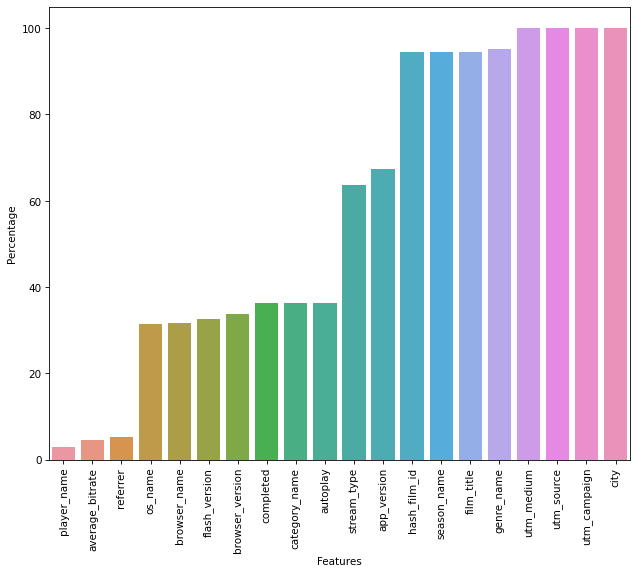

In [49]:
plt.figure(figsize=(10,8),dpi=75)
sns.barplot(x=missing_clm.index,y=missing_clm)
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.xlabel('Features')
plt.show()

In [55]:
df['player_name'] = df['player_name'].fillna(df['player_name'].mode().iloc[0])

In [57]:
df['average_bitrate'] = df['average_bitrate'].fillna(df['average_bitrate'].mean())

In [60]:
df.drop(columns='referrer',axis=1,inplace=True)

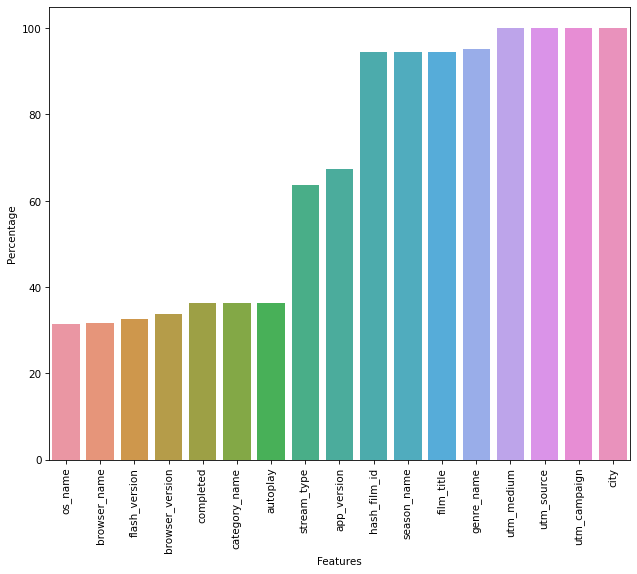

In [63]:
missing_clm = missing_percentage(df)

plt.figure(figsize=(10,8),dpi=75)
sns.barplot(x=missing_clm.index,y=missing_clm)
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.xlabel('Features')
plt.show()

In [65]:
missing_column = ['city','utm_campaign','utm_source','utm_medium','genre_name','film_title','season_name','hash_film_id']
df.drop(columns=missing_column,axis=1,inplace=True)

In [79]:
df['os_name'].fillna('Other',inplace=True)

In [82]:
df['os_name'] = df['os_name'].astype('category')

In [86]:
df['browser_name'] = df['browser_name'].astype('object')
df['browser_name'].fillna('Other',inplace=True)

In [89]:
df['flash_version'] = df['flash_version'].fillna(df['flash_version'].mode().iloc[0])

In [92]:
df['browser_version'].fillna(df['browser_version'].mode().iloc[0],inplace=True)

In [95]:
df['completed'].fillna(df['completed'].mode().iloc[0],inplace=True)

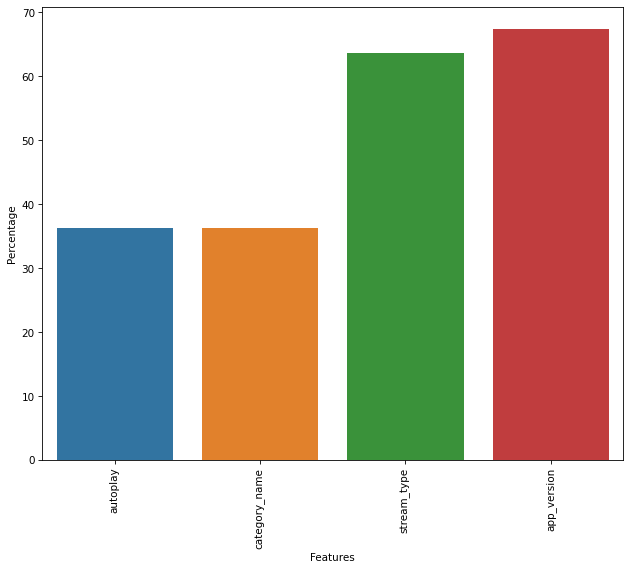

In [96]:
missing_clm = missing_percentage(df)

plt.figure(figsize=(10,8),dpi=75)
sns.barplot(x=missing_clm.index,y=missing_clm)
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.xlabel('Features')
plt.show()

In [98]:
df['autoplay'].fillna(df['autoplay'].mode().iloc[0],inplace=True)

In [100]:
df['category_name'].fillna(df['category_name'].mode().iloc[0],inplace=True)

In [104]:
df['stream_type'] = df['stream_type'].astype('object')
df['stream_type'].fillna('RadioStream',inplace=True)
df['stream_type'] = df['stream_type'].astype('category')

In [107]:
df['app_version'].value_counts()
df['app_version'].fillna(df['app_version'].mode().iloc[0],inplace=True)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106406 entries, 0 to 106810
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   hash_content_id    106406 non-null  object             
 1   hash_play_id       106406 non-null  object             
 2   hash_visit_id      106406 non-null  object             
 3   hash_watcher_id    106406 non-null  object             
 4   hash_event_id      106406 non-null  object             
 5   is_login           106406 non-null  bool               
 6   playback_location  106406 non-null  object             
 7   platform           106406 non-null  object             
 8   play_time          106406 non-null  datetime64[ns, UTC]
 9   end_time           106406 non-null  datetime64[ns, UTC]
 10  average_bitrate    106406 non-null  float64            
 11  bitrate_range      106406 non-null  object             
 12  total_bytes        106406 non-